<a href="https://colab.research.google.com/github/darshandahal/MachineLearning/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handle the missing data of given dataset

In [ ]:
!gdown 1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R

Downloading...
From: https://drive.google.com/uc?id=1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R
To: /content/hr.csv
100% 580k/580k [00:00<00:00, 182MB/s]


In [ ]:
# Loading csv data to a pandas dataframe
import pandas as pd
df = pd.read_csv("/content/hr.csv")

In [ ]:
# Print first five rows of dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [ ]:
# Print last five rows of dataset
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
14999,0.71,0.66,5,187,2,0,0,0,sales,medium,NaN
15000,0.75,0.84,3,145,3,1,0,0,support,low,NaN
15001,0.32,0.41,3,138,3,1,0,0,technical,medium,29.0
15002,0.62,0.58,3,148,2,1,0,0,technical,low,NaN
15003,0.81,0.94,3,225,4,0,0,0,hr,medium,NaN


In [ ]:
df.shape

(15004, 11)

It has 15004 rows and 11 columns

# Detecting Missing Data

In [ ]:
df.info()
# df.info() inspect the DataFrame's structure and identify missing values or potential data type issues.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


In this dataframe all column has its required data entries except "salary" and "age" . Both two columns has missing value. so let`s handle the missing data.

In [ ]:
df.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
left                         0
promotion_last_5years        0
Department                   0
salary                      29
age                      11924
dtype: int64

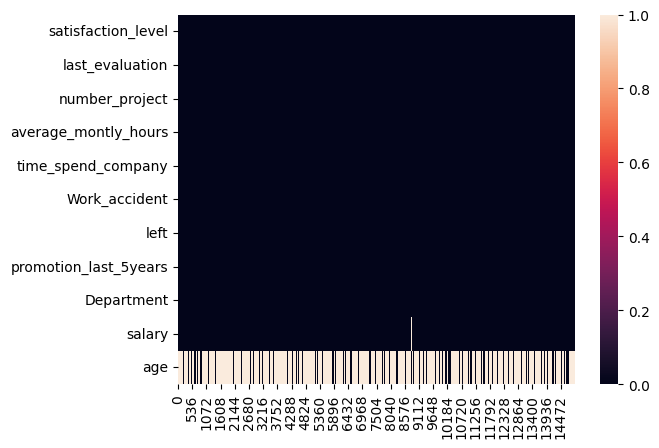

<Figure size 700x300 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isna().transpose())
plt.figure(figsize=(7,3))
plt.show()

In [ ]:
# lets see the missing data in percentage in each column
df.isna().sum() / len(df) * 100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      0.000000
time_spend_company        0.000000
Work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
Department                0.000000
salary                    0.193282
age                      79.472141
dtype: float64

* age column has 79% missing data where as
* salary column has 0.19% missing data.

# How to handle missing values:

##  Delete
* If the target is missing we drop the row.
* If a column contains more than 70% data missing we drop the column


##  Imputation: fill in missing values

* Mean: If data is in normal distribution and with no outliers we fill missing data using mean
* Median: If data is in normal distribution and with outliers we fill missing data using median
* mode: mode is used to fill in missing values for categorical data.
* Interpolation:

##  Algorithms to fill in missing data
* Linear Regression
* KNN
* Clustering
* MICE
* Iterative Imputer

## Use other EDA(Exploratory data analysis) technique to fill in missing data.


So in our data we drop the column "age" because it has more then 70% missing values.

In [ ]:
df.drop(columns = ['age'], inplace = True)

In [ ]:
# Let`s check the dataframe once again
df.isna().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
Department                0
salary                   29
dtype: int64

* Here salary has missing values, we may directly use 'dropna()' to remove missing or null values from a DataFrame but it has high rate of data loss as it removes any row that contains at least one missing value. So we use imputation method of fill in missing values.

In [ ]:
# Filling the missing value of salary columns through mode imputation because it has categorical value
mode_value = df['salary'].mode()[0]
df['salary'].fillna(mode_value, inplace = True)

In [ ]:
df['salary']

0           low
1        medium
2        medium
3          high
4          high
          ...  
14999    medium
15000       low
15001    medium
15002       low
15003    medium
Name: salary, Length: 15004, dtype: object

In [ ]:
# check the entire dataframe again
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64